In [ ]:
# Building Neural Networks with PyTorch


In [ ]:
# Step 1.1

In [ ]:
# Step 1.2

In [2]:
# Step 2.1
import torch

# Create a scalar
scalar = torch.tensor(5)
print("Scalar:", scalar)

# Create a 1D tensor (vector)
vector = torch.tensor([1.0, 2.0, 3.0])
print("Vector:", vector)

# Create a 2D tensor (matrix)
matrix = torch.tensor([[1.0, 2.0, 3.4], [3.0, 4.0, 5.0]])
print("Matrix:\n", matrix)

# Check shape and datatype
print("Shape of matrix:", matrix.shape)
print("Datatype:", matrix.dtype)

Scalar: tensor(5)
Vector: tensor([1., 2., 3.])
Matrix:
 tensor([[1.0000, 2.0000, 3.4000],
        [3.0000, 4.0000, 5.0000]])
Shape of matrix: torch.Size([2, 3])
Datatype: torch.float32


In [3]:
# Step 2.2
# Create a 2D tensor
x = torch.tensor([[1, 2, 3], [4, 5, 6]])

# Reshape the tensor using .view()
reshaped = x.view(3, 2)
print("Original Shape:", x.shape)
print("Reshaped to (3,2):\n", reshaped)

# Indexing
print("First row:", x[0])
print("Element at (1,2):", x[1, 2])

# Element-wise operations
print("Tensor * 2:\n", x * 2)
print("Tensor + 3:\n", x + 3)

Original Shape: torch.Size([2, 3])
Reshaped to (3,2):
 tensor([[1, 2],
        [3, 4],
        [5, 6]])
First row: tensor([1, 2, 3])
Element at (1,2): tensor(6)
Tensor * 2:
 tensor([[ 2,  4,  6],
        [ 8, 10, 12]])
Tensor + 3:
 tensor([[4, 5, 6],
        [7, 8, 9]])


In [4]:
# Step 2.3
# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

# Create tensor on CPU and move to GPU
tensor_cpu = torch.ones((3, 3))
tensor_gpu = tensor_cpu.to(device)

print("Tensor on GPU:\n", tensor_gpu)

# Move it back to CPU (if needed)
tensor_back = tensor_gpu.to("cpu")
print("Tensor back on CPU:\n", tensor_back)

Using device: cpu
Tensor on GPU:
 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
Tensor back on CPU:
 tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [12]:
# Step 3.1
import torch
import torch.nn as nn
import torch.nn.functional as F

# Step 1: Define a simple neural network
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(3, 6)  # Input layer: 3 features → 4 neurons
        self.fc2 = nn.Linear(6, 2)  # Hidden layer: 4 neurons → 2 output neurons

    def forward(self, x):
        x = F.sigmoid(self.fc1(x))    # Apply ReLU after first layer
        x = self.fc2(x)            # Output layer (no activation here for now)
        return F.relu(x)

# Step 2: Instantiate the model
model = SimpleNet()
print(model)

# Step 3: Pass a sample input through the model
sample_input = torch.randn(1, 3)  # Batch size of 1, input size of 3
output = model(sample_input)

print("Input:", sample_input)
print("Output:", output)

SimpleNet(
  (fc1): Linear(in_features=3, out_features=6, bias=True)
  (fc2): Linear(in_features=6, out_features=2, bias=True)
)
Input: tensor([[ 0.7583, -0.4072,  1.0279]])
Output: tensor([[0., 0.]], grad_fn=<ReluBackward0>)


In [18]:
# Step 4.1
import torch
import torch.nn as nn
import torch.nn.functional as F

# Define a very simple neural network
class SimpleClassifier(nn.Module):
    def __init__(self):
        super(SimpleClassifier, self).__init__()
        self.fc1 = nn.Linear(4, 3)  # 4 features → 3 hidden units
        self.fc2 = nn.Linear(3, 2)  # 3 hidden units → 2 output classes

    def forward(self, x):
        x = F.relu(self.fc1(x))
        return self.fc2(x)  # Output logits (no softmax here, since loss function expects raw scores)

# Create an instance of the network
model = SimpleClassifier()

# Generate a random input tensor (e.g., batch size = 1, 4 features)
input_data = torch.randn(1, 4)

# Forward pass
logits = model(input_data)
print("Logits (Raw Outputs):", logits)

# Define target label (e.g., class 0 or 1)
target = torch.tensor([1])  # True label for classification

# Define the loss function
loss_fn = nn.CrossEntropyLoss()

# Compute loss
loss = loss_fn(logits, target)
print("Loss:", loss.item())

Logits (Raw Outputs): tensor([[-0.1040,  0.9741]], grad_fn=<AddmmBackward0>)
Loss: 0.29286977648735046


In [19]:
# Step 4.2
# Step 1: Clear existing gradients
model.zero_grad()

# Step 2: Backward pass to compute gradients
loss.backward()

In [20]:
# Step 3: Inspect gradients
print("Gradients for fc1 weights:\n", model.fc1.weight.grad)
print("Gradients for fc1 weights:\n", model.fc1.bias.grad)

Gradients for fc1 weights:
 tensor([[ 0.0000, -0.0000, -0.0000,  0.0000],
        [-0.1515,  0.0145,  0.2603, -0.0490],
        [-0.1363,  0.0130,  0.2341, -0.0440]])
Gradients for fc1 weights:
 tensor([ 0.0000, -0.1019, -0.0917])


In [23]:
frozen_tensor = logits.detach()
print(frozen_tensor.grad)

None


In [1]:
# Step 5.1
import torch
from torch.utils.data import Dataset, DataLoader

# Custom random dataset
class RandomDataset(Dataset):
    def __init__(self, size, image_shape, num_classes):
        self.size = size
        self.image_shape = image_shape
        self.num_classes = num_classes

    def __len__(self):
        return self.size

    def __getitem__(self, idx):
        image = torch.rand(self.image_shape)
        label = torch.randint(0, self.num_classes, (1,)).item()

        # Normalize: (value - mean) / std
        mean = 0.5
        std = 0.5
        image = (image - mean) / std

        return image, label

# Instantiate the dataset and DataLoader
train_dataset = RandomDataset(size=1000, image_shape=(1, 28, 28), num_classes=10)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

In [2]:
# Step 5.2
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Define the neural network
class SmallNet(nn.Module):
    def __init__(self):
        super(SmallNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)  # Flattened image to 128 neurons
        self.fc2 = nn.Linear(128, 10)       # 10 output classes (digits 0-9)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the image
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate model, optimizer, and loss function
model = SmallNet()
optimizer = optim.SGD(model.parameters(), lr=0.01)
loss_fn = nn.CrossEntropyLoss()

In [4]:
# Step 5.3
# Number of training epochs
epochs = 30

for epoch in range(epochs):
    total_loss = 0

    for images, labels in train_loader:
        # Step 1: Zero the gradients
        optimizer.zero_grad()

        # Step 2: Forward pass
        outputs = model(images)

        # Step 3: Compute loss
        loss = loss_fn(outputs, labels)

        # Step 4: Backward pass
        loss.backward()

        # Step 5: Update weights
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {total_loss:.4f}")

Epoch 1, Loss: 36.9676
Epoch 2, Loss: 36.9558
Epoch 3, Loss: 36.8986
Epoch 4, Loss: 36.9312
Epoch 5, Loss: 37.0248
Epoch 6, Loss: 37.0624
Epoch 7, Loss: 37.0505
Epoch 8, Loss: 36.9670
Epoch 9, Loss: 36.9956
Epoch 10, Loss: 36.9849
Epoch 11, Loss: 36.9444
Epoch 12, Loss: 36.9771
Epoch 13, Loss: 36.9883
Epoch 14, Loss: 36.9597
Epoch 15, Loss: 36.9357
Epoch 16, Loss: 37.0309
Epoch 17, Loss: 36.9617
Epoch 18, Loss: 36.9768
Epoch 19, Loss: 36.9902
Epoch 20, Loss: 36.8814
Epoch 21, Loss: 36.9258
Epoch 22, Loss: 36.8618
Epoch 23, Loss: 36.9012
Epoch 24, Loss: 36.9523
Epoch 25, Loss: 36.9400
Epoch 26, Loss: 36.8898
Epoch 27, Loss: 36.9362
Epoch 28, Loss: 36.9076
Epoch 29, Loss: 36.9694
Epoch 30, Loss: 36.9008


In [5]:
# Step 6.1
import torch
from torch.utils.data import Dataset, DataLoader

# Define the same RandomDataset class again
class RandomDataset(Dataset):
    def __init__(self, size, image_shape, num_classes):
        self.size = size
        self.image_shape = image_shape
        self.num_classes = num_classes

    def __len__(self):
        return self.size

    def __getitem__(self, idx):
        image = torch.rand(self.image_shape)
        label = torch.randint(0, self.num_classes, (1,)).item()

        # Normalize image
        mean = 0.5
        std = 0.5
        image = (image - mean) / std

        return image, label

# Create a new, separate test dataset
test_dataset = RandomDataset(size=300, image_shape=(1, 28, 28), num_classes=10)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [6]:
# Step 6.2
# Set the model to evaluation mode
model.eval()

correct = 0
total = 0

# Disable gradient tracking for inference
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)  # Get predicted class
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 10.33%


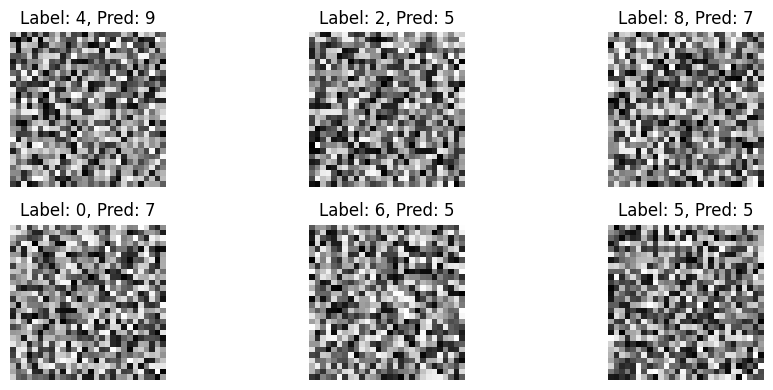

In [7]:
# Step 6.3
import matplotlib.pyplot as plt

# Get a batch of test images
images, labels = next(iter(test_loader))

# Run inference
with torch.no_grad():
    outputs = model(images)
    _, preds = torch.max(outputs, 1)

# Plot the first 6 images with predictions
plt.figure(figsize=(10, 4))
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.title(f"Label: {labels[i]}, Pred: {preds[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()